In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("ex1.txt",header=None)
data

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


Text(0.5, 1.0, 'Profit prediction')

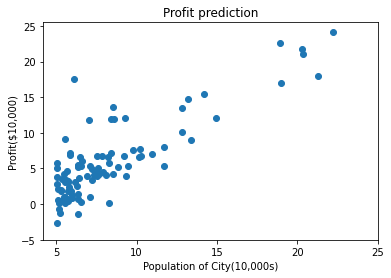

In [4]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City(10,000s)")
plt.ylabel("Profit($10,000)")
plt.title("Profit prediction")


In [5]:
def computeCost(X,y,theta):
  m = len(y)
  h = X.dot(theta)
  square_err = (h-y)**2
  return 1/(2*m) * np.sum(square_err)

In [6]:
data1 = data.values
m = data1[:,0].size
X = np.append(np.ones((m,1)),data1[:,0].reshape(m,1),axis=1)
y = data1[:,1].reshape(m,1)
theta = np.zeros((2,1)) 
print("The value is : ",computeCost(X,y,theta))

The value is :  32.072733877455676


In [15]:

def gradientdescent(X,y,theta,alpha,numiter):
  m = len(y)
  hist = []

  for i in range(numiter):
    predictions = X.dot(theta)
    error = np.dot(X.transpose(),(predictions-y))
    descent = alpha * 1/m * error
    theta -= descent
    hist.append(computeCost(X,y,theta)) 
  return theta,hist

In [16]:
theta ,hist = gradientdescent(X,y,theta,0.01,1500)
print("h(x) = "+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) = -3.63 + 1.17x1


Text(0.5, 1.0, 'Cost function using Gradient Descent')

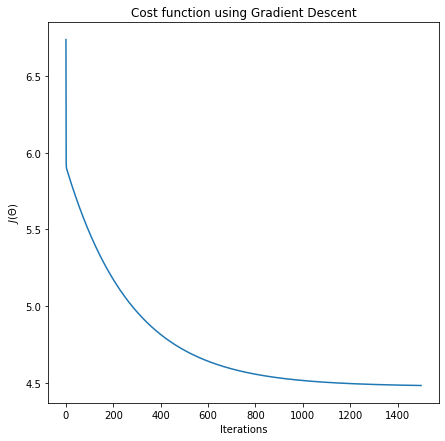

In [17]:
plt.figure(figsize = (7,7))
plt.plot(hist)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")


Text(0.5, 1.0, 'Profit Prediction')

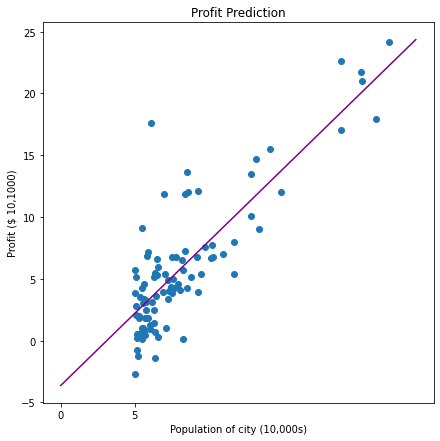

In [18]:
plt.figure(figsize = (7,7))
plt.scatter(data[0],data[1])
xval = [x for x in range(25)]
yval = [y*theta[1] + theta[0] for y in xval]
plt.plot(xval,yval,color='purple')
plt.xticks(np.arange(5.30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of city (10,000s)")
plt.ylabel("Profit ($ 10,1000)")
plt.title("Profit Prediction")

In [19]:
def predict(x,theta):
  predictions = np.dot(theta.transpose(),x)
  return predictions[0]

In [20]:
predict1 = predict(np.array([1,3.5]),theta)*10000
print("For population of 35,000, we pewdict a profit of $ "+str(round(predict1,0)))

For population of 35,000, we pewdict a profit of $ 4520.0


In [21]:
predict2 = predict(np.array([1,7]),theta)*10000
print("For population of 70,000, we pewdict a profit of $ "+str(round(predict2,0)))


For population of 70,000, we pewdict a profit of $ 45342.0
